<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Setting-up-the-environment" data-toc-modified-id="Setting-up-the-environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up the environment</a></span></li><li><span><a href="#Calling-Methods" data-toc-modified-id="Calling-Methods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calling Methods</a></span></li><li><span><a href="#Loading-the-dataset" data-toc-modified-id="Loading-the-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading the dataset</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Feature-Engineering-/-Preprocessing" data-toc-modified-id="Feature-Engineering-/-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering / Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Summary Statistics</a></span></li></ul></li><li><span><a href="#Discrepancy" data-toc-modified-id="Discrepancy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Discrepancy</a></span></li><li><span><a href="#Splitting-the-data-into-Train-and-Test-set" data-toc-modified-id="Splitting-the-data-into-Train-and-Test-set-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Splitting the data into Train and Test set</a></span></li><li><span><a href="#Checking-Purity-level-of-nodes-using-Decision-Tree" data-toc-modified-id="Checking-Purity-level-of-nodes-using-Decision-Tree-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Checking Purity level of nodes using Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance-for-future-pruning" data-toc-modified-id="Feature-Importance-for-future-pruning-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Feature Importance for future pruning</a></span></li><li><span><a href="#Heat-map-stressing-correlation-analysis" data-toc-modified-id="Heat-map-stressing-correlation-analysis-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Heat map stressing correlation analysis</a></span></li><li><span><a href="#Correlation-analysis-with-potentially-biased-variables-removed" data-toc-modified-id="Correlation-analysis-with-potentially-biased-variables-removed-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Correlation analysis with potentially biased variables removed</a></span></li></ul></li><li><span><a href="#Feeding-the-dataset-into-ML-algorithms-and-Hyperparameter-tuning" data-toc-modified-id="Feeding-the-dataset-into-ML-algorithms-and-Hyperparameter-tuning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feeding the dataset into ML algorithms and Hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-test" data-toc-modified-id="Linear-Regression-test-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Linear Regression test</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Neural Networks</a></span></li></ul></li><li><span><a href="#Removing-Potentially-Biased-Features" data-toc-modified-id="Removing-Potentially-Biased-Features-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Removing Potentially Biased Features</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-on-potentially-unbiased-dataset" data-toc-modified-id="Linear-Regression-on-potentially-unbiased-dataset-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Linear Regression on potentially unbiased dataset</a></span></li><li><span><a href="#Bagging-on-potentially-unbiased-dataset" data-toc-modified-id="Bagging-on-potentially-unbiased-dataset-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Bagging on potentially unbiased dataset</a></span></li><li><span><a href="#Boosting-Unbiased" data-toc-modified-id="Boosting-Unbiased-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Boosting Unbiased</a></span></li><li><span><a href="#Neural-Networks-Unbiased" data-toc-modified-id="Neural-Networks-Unbiased-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Neural Networks Unbiased</a></span></li></ul></li></ul></div>

# Summary

The purpose of this study is: 

    a) to stress the importance of Data Scientists when dealing with sensitive information such as the explanation of default in financial products to clients who believe were incorrectly denied to have a loan, mortgage, and other products;

    b) to provide a reasonable explanation based on socioeconomic activity, historical relationship, and financial health analysis;

    c) we compare human analysis versus IBM automated processes through AI Fairness 360 platform.

We are going to see how the transformed dataset impacts the accuracy and fairness of a trained model. I highly encourage readers to view the documentation to understand the variables and the encoding criteria used for this comparison. 

There are many metrics one can use to detect the presence of bias. Likewise, there are many different bias mitigation algorithms one can employ, many of which of my knowledge but not the focus on this study due to the simplicity of the requested German dataset.

As mentioned earlier, both fairness metrics and mitigation algorithms can be performed at various stages of the machine learning pipeline. We recommend checking for bias as often as possible, using as many metrics are relevant for the application domain. We also recommend incorporating bias detection in an automated continuous integration pipeline to ensure bias awareness as a software project evolves.

# Setting up the environment 


In [1]:
# Settings
# !pip install jupyter_contrib_nbextensions
# !pip install aif360

import os
import pandas as pd
import psutil
import multiprocessing as mp

# Display python version and operational system-specif parameters 
import sys
print(sys.version)

# Check the number of cores and memory usage
num_cores = mp.cpu_count()
print("This kernel has ",num_cores,"cores and memory usage of:",psutil.virtual_memory())

# # Check Dask and Hosting the diagnostics dashboard
# cluster = LocalCluster()
# client = Client(cluster)
# client

# Expands the visualization of a matrix
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 300)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
This kernel has  4 cores and memory usage of: svmem(total=8589934592, available=3047927808, percent=64.5, used=4302725120, free=158494720, active=2699907072, inactive=2549620736, wired=1602818048)


# Calling Methods 

In [2]:
# Load all necessary packages
import sys
sys.path.insert(1, "../")  

import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


/Users/speedy/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Loading the dataset

In [3]:
# Data path
data_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
german_numeric_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
# german_data.to_csv("mydata.csv", index=False, header=False)
# german_data.info()

In [4]:
def open_data(data):
    '''
    This function does as follows:
    1. Reads the german.data file from the web as a Pandas Dataframe, 
    2. Inserts a column names according to german.data documentation as a header,
    3. Splits the data from one column to 21 columns,
    4. Returns the data
    
    '''
    names = ["Financial", "Duration", "History", "Purpose", "Amount", "Bond", "Employment", 
               "Installments", "Gender", "Guarantors", "Residence", "Property", "Age", "Installments2",
               "Housing", "Products", "Job", "Liabler", "Telephone", "Foreign", "Default"]
    data = pd.read_csv(data_path,names = names, delimiter=' ')
    return data


In [5]:
# Calling open_data function 
german_data = open_data("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data")
german_data.head(2)

,Financial,Duration,History,Purpose,Amount,Bond,Employment,Installments,Gender,Guarantors,Residence,Property,Age,Installments2,Housing,Products,Job,Liabler,Telephone,Foreign,Default
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2


# Data Exploration

The German dataset seems to force a bias to occur. This statement is proved after carefull analysis of the original variable creation, for example:

        a) Gender and Civil Status are stored together, giving priority to male subjects as for females there is no category for married or widowed. They share this category with divorced and separated what according to Canadian standards of impartiality would not be acceptable. We tried to solve this separating this variables into Gender, and Civil (status);
        
        b) Job has non-residents classified as unemployed or unskilled, different than residents that only has unskilled as well the ambiguous official and officer classification together with skilled or highly qualified employee. We tried to solve the discrepancy by dividing this category into Job and Resident.
        
There were also other bias imputation Bond, Credit purpose, Installments, Credit history, Guarantors, Foreign workers that were not separated in different classification groups as they need some more reflection and information to base the displacement criteria.

In [6]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Financial      1000 non-null   object
 1   Duration       1000 non-null   int64 
 2   History        1000 non-null   object
 3   Purpose        1000 non-null   object
 4   Amount         1000 non-null   int64 
 5   Bond           1000 non-null   object
 6   Employment     1000 non-null   object
 7   Installments   1000 non-null   int64 
 8   Gender         1000 non-null   object
 9   Guarantors     1000 non-null   object
 10  Residence      1000 non-null   int64 
 11  Property       1000 non-null   object
 12  Age            1000 non-null   int64 
 13  Installments2  1000 non-null   object
 14  Housing        1000 non-null   object
 15  Products       1000 non-null   int64 
 16  Job            1000 non-null   object
 17  Liabler        1000 non-null   int64 
 18  Telephone      1000 non-null 

In [7]:
# Dimensions check
german_data.shape

(1000, 21)

In [8]:
german_data.columns

Index(['Financial', 'Duration', 'History', 'Purpose', 'Amount', 'Bond',
       'Employment', 'Installments', 'Gender', 'Guarantors', 'Residence',
       'Property', 'Age', 'Installments2', 'Housing', 'Products', 'Job',
       'Liabler', 'Telephone', 'Foreign', 'Default'],
      dtype='object')

# Feature Engineering / Preprocessing 

We are consenting to transform the whole data set to continuous variables and making this a supervised classification problem. Thus, it is not considered outlier detection, clustering analysis, dimensionality reduction techniques such as Principal Component Analysis, Pearson correlation, etc.

In [9]:
#  Transforming features to continuous values using a dictionary
def encoder(german_data):
    '''
    This function converts numerical values previously stored as type object to int64;
    This function also encodes observations to a respective integer (the greater the better);
    Returns a transformed dataset
    '''
    Financial={"A11":1,"A12":2,"A13":3,"A14":0}
    german_data.Financial=german_data.Financial.apply(lambda x: Financial[x])

    german_data["Duration"] = german_data["Duration"].astype(int)

    History={"A30":3,"A31":3,"A32":2,"A33":1, "A34":0}
    german_data.History=german_data.History.apply(lambda x: History[x])

    Purpose={"A40":1,"A41":2,"A42":3,"A43":4, "A44":5, "A45":6,"A46":7,"A47":8,"A48":9, "A49":10, "A410":11}
    german_data.Purpose=german_data.Purpose.apply(lambda x: Purpose[x])

    german_data["Amount"] = german_data["Amount"].astype(int)

    Bond={"A61":1,"A62":2,"A63":3, "A64":4, "A65":0}
    german_data.Bond=german_data.Bond.apply(lambda x: Bond[x])

    Employment={"A71":0,"A72":1,"A73":2, "A74":3, "A75":4}
    german_data.Employment=german_data.Employment.apply(lambda x: Employment[x])

    german_data["Installments"] = (german_data["Installments"].astype(int))

    Gender={"A91":1,"A92":0,"A93":1, "A94":1, "A95":0}
    Civil={"A91":3,"A92":2,"A93":1, "A94":2, "A95":1}
    german_data["Civil"] = german_data.Gender.apply(lambda x: Civil[x])
    german_data.Gender=german_data.Gender.apply(lambda x: Gender[x])

    Guarantors={"A101":1,"A102":0,"A103":2}
    german_data.Guarantors=german_data.Guarantors.apply(lambda x: Guarantors[x])

    german_data["Residence"] = german_data["Residence"].astype(int)

    Property={"A121":3,"A122":2,"A123":1, "A124":0}
    german_data.Property=german_data.Property.apply(lambda x: Property[x])

    german_data["Age"] = german_data["Age"].astype(int)

    Installments2={"A141":1,"A142":2,"A143":0}
    german_data.Installments2=german_data.Installments2.apply(lambda x: Installments2[x])

    Housing={"A151":1,"A152":2,"A153":0}
    german_data.Housing=german_data.Housing.apply(lambda x: Housing[x])

    german_data["Products"] = german_data["Products"].astype(int)

    Job={"A171":0,"A172":0,"A173":1, "A174":2}
    Resident={"A171":0,"A172":1,"A173":1, "A174":1}
    german_data["Resident"] = german_data.Job.apply(lambda x: Resident[x])
    german_data.Job=german_data.Job.apply(lambda x: Job[x])

    german_data["Liabler"] = german_data["Liabler"].astype(int)

    Telephone={"A191":0,"A192":1}
    german_data.Telephone=german_data.Telephone.apply(lambda x: Telephone[x])

    Foreign={"A201":0,"A202":1}
    german_data.Foreign=german_data.Foreign.apply(lambda x: Foreign[x])

    german_data["Default"] = german_data["Default"].astype(int)
    
    return german_data


In [10]:
# Calling encoder function and storing it in a variable
german_data = encoder(german_data)

## Summary Statistics

In [11]:
german_data.describe()

,Financial,Duration,History,Purpose,Amount,Bond,Employment,Installments,Gender,Guarantors,Residence,Property,Age,Installments2,Housing,Products,Job,Liabler,Telephone,Foreign,Default,Civil,Resident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,20.903000,1.415000,3.828000,3271.258000,1.190000,2.384000,2.973000,0.690000,1.011000,2.845000,1.642000,35.546000,0.233000,1.605000,1.407000,0.92600,1.155000,0.404000,0.037000,1.300000,1.502000,0.978000
std,0.957034,12.058814,1.003884,2.744439,2822.736876,0.966869,1.208306,1.118715,0.462725,0.304913,1.103718,1.050209,11.375469,0.522479,0.674856,0.577654,0.60406,0.362086,0.490943,0.188856,0.458487,0.591901,0.146757
min,0.000000,4.000000,0.000000,1.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,12.000000,0.000000,2.000000,1365.500000,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,27.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,18.000000,2.000000,3.000000,2319.500000,1.000000,2.000000,3.000000,1.000000,1.000000,3.000000,2.000000,33.000000,0.000000,2.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,24.000000,2.000000,4.000000,3972.250000,1.000000,4.000000,4.000000,1.000000,1.000000,4.000000,3.000000,42.000000,0.000000,2.000000,2.000000,1.00000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000
max,3.000000,72.000000,3.000000,11.000000,18424.000000,4.000000,4.000000,4.000000,1.000000,2.000000,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,2.00000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000


In [12]:
print("Transformed data shape is: ", german_data.shape)
german_data.head(2)

Transformed data shape is:  (1000, 23)


,Financial,Duration,History,Purpose,Amount,Bond,Employment,Installments,Gender,Guarantors,Residence,Property,Age,Installments2,Housing,Products,Job,Liabler,Telephone,Foreign,Default,Civil,Resident
0,1,6,0,4,1169,0,4,4,1,1,4,3,67,0,2,2,1,1,1,0,1,1,1
1,2,48,2,4,5951,1,2,2,0,1,2,3,22,0,2,1,1,1,0,0,2,2,1


In [13]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Financial      1000 non-null   int64
 1   Duration       1000 non-null   int64
 2   History        1000 non-null   int64
 3   Purpose        1000 non-null   int64
 4   Amount         1000 non-null   int64
 5   Bond           1000 non-null   int64
 6   Employment     1000 non-null   int64
 7   Installments   1000 non-null   int64
 8   Gender         1000 non-null   int64
 9   Guarantors     1000 non-null   int64
 10  Residence      1000 non-null   int64
 11  Property       1000 non-null   int64
 12  Age            1000 non-null   int64
 13  Installments2  1000 non-null   int64
 14  Housing        1000 non-null   int64
 15  Products       1000 non-null   int64
 16  Job            1000 non-null   int64
 17  Liabler        1000 non-null   int64
 18  Telephone      1000 non-null   int64
 19  Foreign

# Discrepancy

It was found in the German dataset discrepancies leading us to misclassification and redundancy as shown below:

For example:

Foreign variable stores clients who do not hold a citizenship status. We found 963 clients encoded as the value of 0 that are foreigners.

Resident variable stores clients who are permanent residents. This variable was created after another variable called Job and shows that only 22 clients who do not have a job and are non-resident, unemployed or unskilled. They were encoded as the value of 0.

That is the only time that the word non-resident was used, leaving room for uncertainties. It is not explicitly stated who are resident or non-resident for other Job categories.

At the end, the Job variable stores only data referring to work status. It reads 0 as being unemployed or unskilled clients.

In [14]:
german_data["Resident"].value_counts()

1    978
0     22
Name: Resident, dtype: int64

In [15]:
german_data["Foreign"].value_counts()

0    963
1     37
Name: Foreign, dtype: int64

In [16]:
german_data["Job"].value_counts()

1    630
0    222
2    148
Name: Job, dtype: int64

# Splitting the data into Train and Test set

In [17]:
# Splitting the data into independent variables (X) and dependant variable (y)
X = german_data.drop(["Default"], axis=1)
y = german_data["Default"]
X_train, X_test, y_train, y_test = X.iloc[:750, :], X.iloc[750:, :], y.iloc[:750], y.iloc[750:]

print("X_train shape is: ", X_train.shape) 
print("X_test shape is: ", X_test.shape) 
print("y_train shape is: ", y_train.shape) 
print("y_test shape is: ", y_test.shape)

X_train shape is:  (750, 22)
X_test shape is:  (250, 22)
y_train shape is:  (750,)
y_test shape is:  (250,)


# Checking Purity level of nodes using Decision Tree 

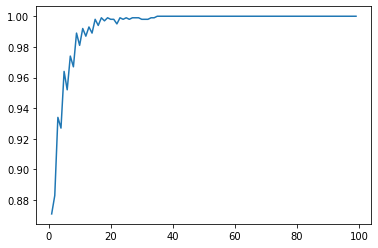

In [18]:

num_trees = range(1, 100)
scores = []
for trees in num_trees:
    rf = RandomForestClassifier(n_estimators = trees, random_state = 30)
    rf.fit(X, y)
    scores.append(rf.score(X, y))
plt.plot(num_trees, scores);

In [19]:
num_trees = range(1, 100)
scores = []
for trees in num_trees:
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=10)
    dt.fit(X_train, y_train)
    y_pred =  dt.predict(X_test)
#     scores.append(clf.score(y_pred, y_test))
# plt.plot(num_trees, scores);
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9266666666666666
Accuracy Score on test data:  0.756


## Feature Importance for future pruning

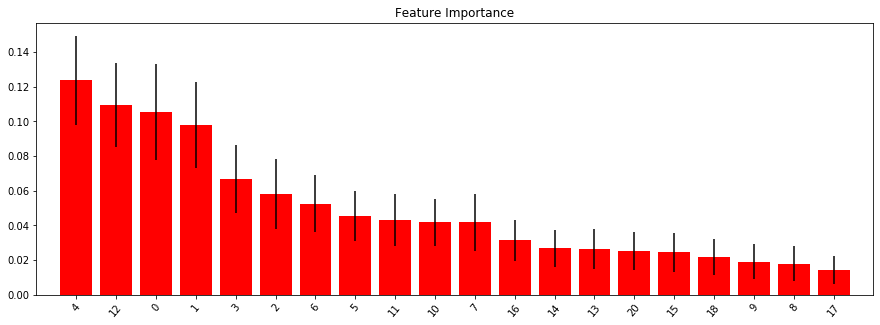

In [20]:
skplt.estimators.plot_feature_importances(rf, figsize = (15, 5), x_tick_rotation = 50);

## Heat map stressing correlation analysis

This analysis brings some expected correlated criteria and intriguing others:

    1. Really Positive correlation between Credit Amount and the Duration of an existing checking account, 
    2. Medium Positive correlation between Property, Residence, and Housing as clients who own their houses have a property and do live there for a few years, as well as Job and Foreign as this is the most reasonable explanation for having a foreigner in the country (if not for study), 
    3. Weak Positive correlation between having a Job and a registered Telephone number,
    4. Really Negative correlation between Civil status, Gender and Permanent Resident status; and surprisingly between Credit History and the number of products with the financial institution,
    5. Weak Negative correlation between the Duration of the relationship, the Amount of money being administrated by the institution, and owning a Property.

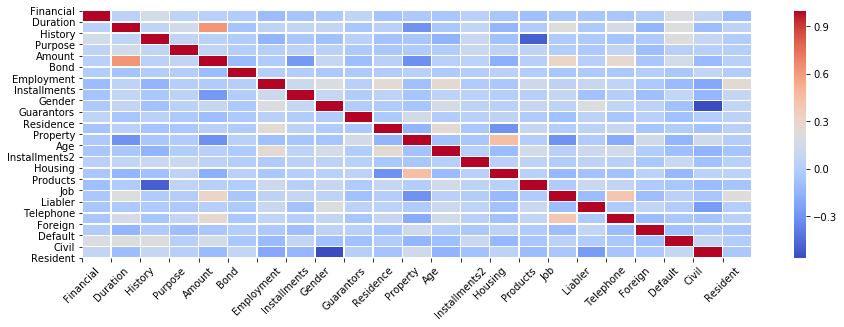

In [21]:
dtset = german_data
correlation = dtset.corr() # data correlation 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(212)
sns.heatmap(correlation, ax=ax, cmap="coolwarm", linewidths = 0.5)
# fig.colorbar(cax)
ticks = np.arange(0,len(dtset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=45)
ax.set_yticks(ticks)
ax.set_xticklabels(dtset.columns)
ax.set_yticklabels(dtset.columns)
plt.show()

## Correlation analysis with potentially biased variables removed

Not much changed when we removed Gender, Foreign, and Resident variables. 

The feature correlation seems unnaltered.
We need to bear in mind that this is a transformed dataset where each varaible was treated individually, so no great bias nor covariate interference was expected.

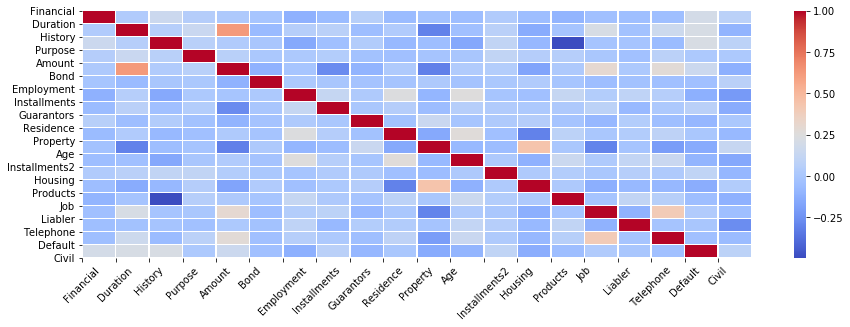

In [22]:
# Dropping potentially biased features

dtset = german_data.drop(columns = ["Gender", "Foreign" ,"Resident"], axis=1)
correlation = dtset.corr() # data correlation 
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(212)
sns.heatmap(correlation, ax=ax, cmap="coolwarm", linewidths = 0.5)
# fig.colorbar(cax)
ticks = np.arange(0,len(dtset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=45)
ax.set_yticks(ticks)
ax.set_xticklabels(dtset.columns)
ax.set_yticklabels(dtset.columns)
plt.show()

# Feeding the dataset into ML algorithms and Hyperparameter tuning

## Linear Regression test

We are running a Linear Regression model for the sake of finding the intercept and coeficient in case we need to plot the linear relation of the dataset. Thus, no metrics such of logarithm loss nor root mean squared error will be considered.

In [23]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Interception in: ", lr.intercept_)
print("Coefficient: ", lr.coef_)


Root Mean squared error:  0.4394888835675447
Linear Interception in:  0.7057247947238433
Coefficient:  [ 7.92600568e-02  4.51966421e-03  9.16540759e-02 -7.03973656e-03
  1.58740889e-05 -1.91933199e-02 -4.16494661e-02  5.84597279e-02
 -1.11769841e-03 -1.53632558e-01  1.03106037e-02 -2.07485844e-02
 -9.16329417e-04  5.05725347e-02 -2.03002210e-02  8.61251416e-02
 -4.00286759e-04  8.65936023e-02 -7.39489686e-02 -1.12745473e-01
  1.27579124e-01  4.73698954e-02]


## Bagging

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

It is the ratio of True Positive values correctly classified.

In [24]:
# Get some classifiers to evaluate
seed = 42

# Create classifiers
rf = RandomForestClassifier(n_estimators=200, random_state=seed, warm_start=True, class_weight="balanced")

et = ExtraTreesClassifier(n_estimators=200)

knn = KNeighborsClassifier(n_neighbors=7, leaf_size=20, p=1, n_jobs=-1)

svc = SVC()

rg = RidgeClassifier(alpha=1.5, normalize=True, tol=0.01, class_weight="balanced", solver="auto", 
                     random_state=seed)

ber = BernoulliNB(alpha=1.5, binarize=0.2)

gau = GaussianNB(var_smoothing=0.2)

clf_array = [rf, et, knn, svc, rg, ber, gau]
labels = ["RF", "ET", "KNN", "SVC", "RG", "Ber", "Gau"]
for clf, label in zip(clf_array, labels):
    vanilla_scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, n_estimators=200, max_samples=0.2, max_features=10, random_state=seed)
    clf = clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)
    
    print("Accuracy of ", label, ": ", accuracy_score(y_test, clf_pred))
    print("F-1 score of ", label, ": ", f1_score(y_test, clf_pred))
    print("Mean of ", label, "vanilla: ", vanilla_scores.mean(),  "\t\tstd: (+/-): ", vanilla_scores.std() )
    print("Mean of ", label, "bagging: ", bagging_scores.mean(), "\t\tstd: (+/-): ", bagging_scores.std(), "\n")

/Users/speedy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/Users/speedy/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy of  RF :  0.78
F-1 score of  RF :  0.8586118251928021
Mean of  RF vanilla:  0.7506206733048838 		std: (+/-):  0.04410324900421229
Mean of  RF bagging:  0.7133911806543385 		std: (+/-):  0.014736211833402542 



/Users/speedy/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy of  ET :  0.752
F-1 score of  ET :  0.8393782383419689
Mean of  ET vanilla:  0.746692271218587 		std: (+/-):  0.033597490184698924
Mean of  ET bagging:  0.7200398293029873 		std: (+/-):  0.0305804096471023 

Accuracy of  KNN :  0.68
F-1 score of  KNN :  0.7938144329896907
Mean of  KNN vanilla:  0.6945817923186344 		std: (+/-):  0.04814372396045745
Mean of  KNN bagging:  0.7026344238975818 		std: (+/-):  0.01093099784034985 



/Users/speedy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of  SVC :  0.692
F-1 score of  SVC :  0.817966903073286
Mean of  SVC vanilla:  0.7026880037932669 		std: (+/-):  0.0038498514623020426
Mean of  SVC bagging:  0.7026880037932669 		std: (+/-):  0.0038498514623020426 

Accuracy of  RG :  0.724
F-1 score of  RG :  0.7876923076923077
Mean of  RG vanilla:  0.6691014698909437 		std: (+/-):  0.04499722715853482
Mean of  RG bagging:  0.674257942152679 		std: (+/-):  0.060203761128462346 

Accuracy of  Ber :  0.708
F-1 score of  Ber :  0.8113695090439277
Mean of  Ber vanilla:  0.7106183025130394 		std: (+/-):  0.03512210502262882
Mean of  Ber bagging:  0.7040398293029871 		std: (+/-):  0.008200397844364448 

Accuracy of  Gau :  0.708
F-1 score of  Gau :  0.8188585607940446
Mean of  Gau vanilla:  0.7066339497392129 		std: (+/-):  0.032370695265905164
Mean of  Gau bagging:  0.705176386913229 		std: (+/-):  0.03585724419691087 



## Boosting

In [25]:

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
boost_array = [ada_boost, grad_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost], voting="hard")
labels = ["Ada Boost", "Grad Boost", "Ensemble"]
for clf, label in zip([ada_boost, grad_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), 
                                                           scores.std(), label))


Mean: 0.748, std: (+/-) 0.040 [Ada Boost]
Mean: 0.753, std: (+/-) 0.045 [Grad Boost]
Mean: 0.753, std: (+/-) 0.026 [Ensemble]


## Neural Networks

In [26]:
# Binary Classification with Sonar Dataset: Baseline

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(22, input_dim=22, activation="tanh"))
    model.add(Dense(12, input_dim=22, activation="softplus"))
    model.add(Dense(6, input_dim=12, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    history = model.fit(X_train, y_train, epochs=10, verbose=1, batch_size=len(X_train), validation_data=(X_test, y_test), 
                            shuffle=False) # 1 or batch_size=len(X_train) is faster because it updates once every epoch
    print(history)
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 0s 550us/step - loss: 1.8229 - accuracy: 0.0000e+00 - val_loss: 1.7875 - val_accuracy: 0.0000e+00
Epoch 2/10
750/750 [==============================] - 0s 18us/step - loss: 1.7752 - accuracy: 0.0000e+00 - val_loss: 1.7402 - val_accuracy: 0.0000e+00
Epoch 3/10
750/750 [==============================] - 0s 12us/step - loss: 1.7283 - accuracy: 0.0000e+00 - val_loss: 1.6936 - val_accuracy: 0.0000e+00
Epoch 4/10
750/750 [==============================] - 0s 13us/step - loss: 1.6822 - accuracy: 0.0000e+00 - val_loss: 1.6478 - val_accuracy: 0.0000e+00
Epoch 5/10
750/750 [==============================] - 0s 10us/step - loss: 1.6369 - accuracy: 0.0000e+00 - val_loss: 1.6048 - val_accuracy: 0.0000e+00
Epoch 6/10
750/750 [==============================] - 0s 9us/step - loss: 1.5943 - accuracy: 0.0000e+00 - val_loss: 1.5607 - val_accuracy: 0.0000e+00
Epoch 7/10
750/750 [============================

Epoch 4/10
750/750 [==============================] - 0s 8us/step - loss: 0.6378 - accuracy: 0.7027 - val_loss: 0.5821 - val_accuracy: 0.6920
Epoch 5/10
750/750 [==============================] - 0s 9us/step - loss: 0.5835 - accuracy: 0.7027 - val_loss: 0.5241 - val_accuracy: 0.6920
Epoch 6/10
750/750 [==============================] - 0s 11us/step - loss: 0.5268 - accuracy: 0.7027 - val_loss: 0.4686 - val_accuracy: 0.6920
Epoch 7/10
750/750 [==============================] - 0s 8us/step - loss: 0.4728 - accuracy: 0.7027 - val_loss: 0.4135 - val_accuracy: 0.6920
Epoch 8/10
750/750 [==============================] - 0s 9us/step - loss: 0.4194 - accuracy: 0.7027 - val_loss: 0.3594 - val_accuracy: 0.6920
Epoch 9/10
750/750 [==============================] - 0s 8us/step - loss: 0.3665 - accuracy: 0.7027 - val_loss: 0.3063 - val_accuracy: 0.6920
Epoch 10/10
750/750 [==============================] - 0s 8us/step - loss: 0.3145 - accuracy: 0.7027 - val_loss: 0.2538 - val_accuracy: 0.6920
Trai

# Removing Potentially Biased Features

In [27]:
# Splitting the data into train and test

X = german_data.drop(["Default", "Gender", "Foreign" ,"Resident"], axis=1)
y = german_data["Default"]
X_train, X_test, y_train, y_test = X.iloc[:750, :], X.iloc[750:, :], y.iloc[:750], y.iloc[750:]

print("X_train shape is: ", X_train.shape) 
print("X_test shape is: ", X_test.shape) 
print("y_train shape is: ", y_train.shape) 
print("y_test shape is: ", y_test.shape)

X_train shape is:  (750, 19)
X_test shape is:  (250, 19)
y_train shape is:  (750,)
y_test shape is:  (250,)


## Linear Regression on potentially unbiased dataset

In [28]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Root Mean squared error: ", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Interception in: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Root Mean squared error:  0.44040200152003156
Linear Interception in:  0.7307027308851038
Coefficient:  [ 7.94563436e-02  4.70529176e-03  9.14964855e-02 -6.49771166e-03
  1.57075507e-05 -1.89707238e-02 -4.01749117e-02  5.99296775e-02
 -1.54200613e-01  1.07964968e-02 -2.18157515e-02 -9.91450051e-04
  5.24082283e-02 -1.95960178e-02  8.62849147e-02  3.10036074e-03
  8.50116259e-02 -7.26432132e-02  1.29680752e-01]


## Bagging on potentially unbiased dataset

In [29]:
# Get some classifiers to evaluate
seed = 42

# Create classifiers
rf = RandomForestClassifier(n_estimators=200, random_state=seed, warm_start=True, class_weight="balanced")

et = ExtraTreesClassifier(n_estimators=200)

knn = KNeighborsClassifier(n_neighbors=7, leaf_size=20, p=1, n_jobs=-1)

svc = SVC()

rg = RidgeClassifier(alpha=1.5, normalize=True, tol=0.01, class_weight="balanced", solver="auto", 
                     random_state=seed)

ber = BernoulliNB(alpha=1.5, binarize=0.2)

gau = GaussianNB(var_smoothing=0.2)

clf_array = [rf, et, knn, svc, rg, ber, gau]
labels = ["RF", "ET", "KNN", "SVC", "RG", "Ber", "Gau"]
for clf, label in zip(clf_array, labels):
    vanilla_scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, n_estimators=200, max_samples=0.2, max_features=10, random_state=seed)
    clf = clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)
    
    print("Accuracy of ", label, ": ", accuracy_score(y_test, clf_pred))
    print("F-1 score of ", label, ": ", f1_score(y_test, clf_pred))
    print("Mean of ", label, "vanilla: ", vanilla_scores.mean(),  "\t\tstd: (+/-): ", vanilla_scores.std() )
    print("Mean of ", label, "bagging: ", bagging_scores.mean(), "\t\tstd: (+/-): ", bagging_scores.std(), "\n")
    

/Users/speedy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


Accuracy of  RF :  0.796
F-1 score of  RF :  0.8668407310704961
Mean of  RF vanilla:  0.7492332859174964 		std: (+/-):  0.04258862696853836
Mean of  RF bagging:  0.7160398293029872 		std: (+/-):  0.02084808909483915 



/Users/speedy/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/speedy/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy of  ET :  0.744
F-1 score of  ET :  0.8358974358974359
Mean of  ET vanilla:  0.7520431484115695 		std: (+/-):  0.032647730814686575
Mean of  ET bagging:  0.7306548127074443 		std: (+/-):  0.0339529182065215 

Accuracy of  KNN :  0.672
F-1 score of  KNN :  0.7886597938144329
Mean of  KNN vanilla:  0.6958975817923185 		std: (+/-):  0.049091599946478555
Mean of  KNN bagging:  0.7039857752489331 		std: (+/-):  0.011666473561880766 



/Users/speedy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of  SVC :  0.692
F-1 score of  SVC :  0.817966903073286
Mean of  SVC vanilla:  0.7026880037932669 		std: (+/-):  0.0038498514623020426
Mean of  SVC bagging:  0.7026880037932669 		std: (+/-):  0.0038498514623020426 

Accuracy of  RG :  0.708
F-1 score of  RG :  0.7794561933534744
Mean of  RG vanilla:  0.681280227596017 		std: (+/-):  0.043148036201140286
Mean of  RG bagging:  0.673031768610716 		std: (+/-):  0.05880364264325468 

Accuracy of  Ber :  0.716
F-1 score of  Ber :  0.8146214099216711
Mean of  Ber vanilla:  0.7239345661450924 		std: (+/-):  0.030329409123075864
Mean of  Ber bagging:  0.7027064959696537 		std: (+/-):  0.018031375822667197 

Accuracy of  Gau :  0.708
F-1 score of  Gau :  0.8188585607940446
Mean of  Gau vanilla:  0.7066339497392129 		std: (+/-):  0.032370695265905164
Mean of  Gau bagging:  0.705176386913229 		std: (+/-):  0.03487821503223139 



## Boosting Unbiased

In [30]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
boost_array = [ada_boost, grad_boost]

eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost], voting="hard")
labels = ["Ada Boost", "Grad Boost", "Ensemble"]
for clf, label in zip([ada_boost, grad_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), 
                                                           scores.std(), label))
# Let’s perform the same of voting on our boosting models

Mean: 0.742, std: (+/-) 0.045 [Ada Boost]
Mean: 0.748, std: (+/-) 0.042 [Grad Boost]
Mean: 0.748, std: (+/-) 0.031 [Ensemble]


## Neural Networks Unbiased

In [31]:
# Binary Classification with Sonar Dataset: Baseline


# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(19, input_dim=19, activation="tanh"))
    model.add(Dense(12, input_dim=19, activation="softplus"))
    model.add(Dense(6, input_dim=19, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    history = model.fit(X_train, y_train, epochs=10, verbose=1, batch_size=len(X_train), validation_data=(X_test, y_test), 
                            shuffle=False) # 1 or batch_size=len(X_train) is faster because it updates once every epoch
    print(history)
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 0s 428us/step - loss: -0.9473 - accuracy: 0.7027 - val_loss: -1.0055 - val_accuracy: 0.6920
Epoch 2/10
750/750 [==============================] - 0s 7us/step - loss: -0.9695 - accuracy: 0.7027 - val_loss: -1.0364 - val_accuracy: 0.6920
Epoch 3/10
750/750 [==============================] - 0s 8us/step - loss: -0.9994 - accuracy: 0.7027 - val_loss: -1.0672 - val_accuracy: 0.6920
Epoch 4/10
750/750 [==============================] - 0s 8us/step - loss: -1.0293 - accuracy: 0.7027 - val_loss: -1.0981 - val_accuracy: 0.6920
Epoch 5/10
750/750 [==============================] - 0s 10us/step - loss: -1.0592 - accuracy: 0.7027 - val_loss: -1.1291 - val_accuracy: 0.6920
Epoch 6/10
750/750 [==============================] - 0s 9us/step - loss: -1.0892 - accuracy: 0.7027 - val_loss: -1.1601 - val_accuracy: 0.6920
Epoch 7/10
750/750 [==============================] - 0s 8us/step - loss: -1.1192 - acc

Epoch 4/10
750/750 [==============================] - 0s 8us/step - loss: 0.5960 - accuracy: 0.7027 - val_loss: 0.5879 - val_accuracy: 0.6920
Epoch 5/10
750/750 [==============================] - 0s 7us/step - loss: 0.5894 - accuracy: 0.7027 - val_loss: 0.5811 - val_accuracy: 0.6920
Epoch 6/10
750/750 [==============================] - 0s 20us/step - loss: 0.5826 - accuracy: 0.7027 - val_loss: 0.5741 - val_accuracy: 0.6920
Epoch 7/10
750/750 [==============================] - 0s 12us/step - loss: 0.5757 - accuracy: 0.7027 - val_loss: 0.5671 - val_accuracy: 0.6920
Epoch 8/10
750/750 [==============================] - 0s 19us/step - loss: 0.5688 - accuracy: 0.7027 - val_loss: 0.5599 - val_accuracy: 0.6920
Epoch 9/10
750/750 [==============================] - 0s 13us/step - loss: 0.5617 - accuracy: 0.7027 - val_loss: 0.5527 - val_accuracy: 0.6920
Epoch 10/10
750/750 [==============================] - 0s 12us/step - loss: 0.5547 - accuracy: 0.7027 - val_loss: 0.5454 - val_accuracy: 0.6920
